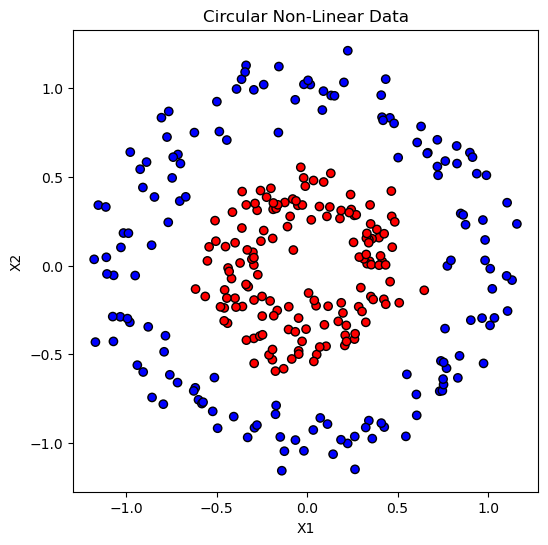

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import seaborn as sns

# Generate synthetic non-linear dataset (circle within circle)
X, y = make_circles(n_samples=300, factor=0.4, noise=0.1, random_state=0)

# Split into training/testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Plot data to visualize
plt.figure(figsize=(6,6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolor='k')
plt.title("Circular Non-Linear Data")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

In [2]:
# Linear SVM Fails here
# Train Linear SVM
linear_model = SVC(kernel='linear')
linear_model.fit(X_train, y_train)

# Accuracy (you’ll see it’s low)
y_pred_linear = linear_model.predict(X_test)
print("Linear SVM Accuracy:", accuracy_score(y_test, y_pred_linear))

Linear SVM Accuracy: 0.5555555555555556


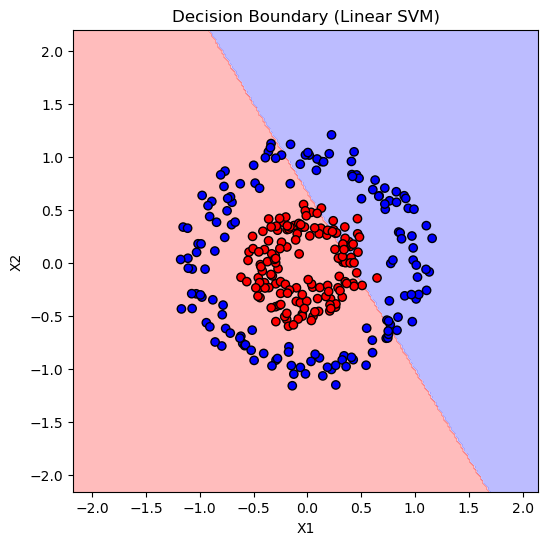

In [3]:
# Plotting decision boundary
def plot_decision_boundary(X, y, model, title):
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(6,6))
    plt.contourf(xx, yy, Z, cmap='bwr', alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolor='k')
    plt.title(title)
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.show()

plot_decision_boundary(X, y, linear_model, "Decision Boundary (Linear SVM)")

In [ ]:
# You'll see that linear SVM cannot separate the circles — because the decision boundary is a line!